# Advertisement
completed
--pandas and seaborn use
--errors
due
--model enhancing by choosing a permutation of features

In [1]:
#importing pandas
import pandas as pd

#reading the data from the url
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

#printing the first 5 data
data.head()

#looking at the shape of the data
print(data.shape)

(200, 4)


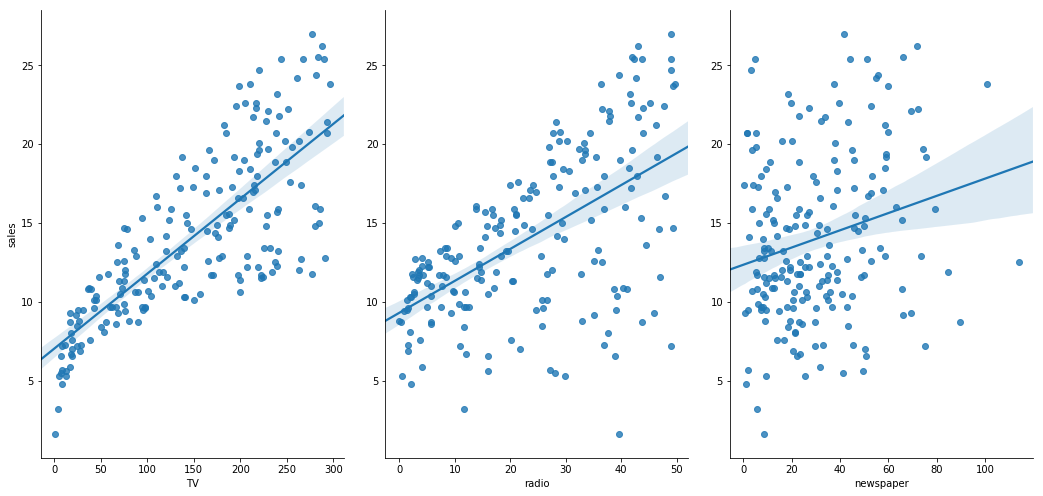

In [2]:
#importing sns from seaborn library and analysing the realtion of features with the target
import seaborn as sns
%matplotlib inline
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars= 'sales', size=7, aspect= 0.7, kind='reg')

In [3]:
#Clearly we can see that the advertisments on newspaper does very little in sales, so we can clearly remove it straight away


In [4]:
#Putting the values of the features in X and the target in y
feature_cols=['TV','radio','newspaper']
y=data['sales']

X=data[feature_cols]
print(X.head(),y.head())

      TV  radio  newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4 1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64


In [5]:
#importing the train_test_split and applying it to
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,random_state= 1)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [7]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr=lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.89276059146153852

In [8]:
# print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)


2.90794702082
[ 0.0468431   0.17854434  0.00258619]


In [9]:
list(zip(feature_cols, lr.coef_))

[('TV', 0.046843103176990419),
 ('radio', 0.17854434380887624),
 ('newspaper', 0.0025861860939889944)]

In [10]:
y_pred= lr.predict(X_test)
print(y_pred)

[ 21.73577184  16.45693776   7.65993185  17.89202679  18.67730671
  23.86271904  16.33623628  13.45649226   9.177296    17.36056228
  14.4677995    9.85697601  17.26057027  16.71866935  15.09530285
  15.58923732  12.45188167  17.27925151  11.0944114   18.06889853
   9.33433055  12.91345761   8.7842804   10.46670654  11.40303174
  15.03104665   9.78479388  19.46028647  18.22954934  17.1958903
  21.60304218  14.71901407  16.29205532  12.36432281  19.98831261
  15.37556411  13.96678297  10.06809496  20.97197274   7.45877832]


In [11]:
from sklearn import metrics
import numpy as np

#calculate MAE 
print(metrics.mean_absolute_error(y_test, y_pred))

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test , y_pred))

#calculate RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.04021540129
1.99188555183
1.41134175586
